In [4]:
import pandas as pd
import numpy as np
import altair as alt



In [5]:
data = pd.read_excel('wuhan.xlsx',engine = 'openpyxl')
data["PATIENT_ID"] = data["PATIENT_ID"].fillna(method='ffill')


In [6]:
data.dtypes.head()
data

,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
0,1.0,2020-01-31 01:09:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2020-01-31 01:25:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,136.0,NaN,...,31.9,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN
2,1.0,2020-01-31 01:44:00.000000,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,103.1,...,NaN,NaN,43.1,NaN,137.7,NaN,NaN,16.0,46.6,130.0
3,1.0,2020-01-31 01:44:59.999999,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2020-01-31 01:56:00.000001,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,375.0,2020-02-16 11:21:00.000001,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,84.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6116,375.0,2020-02-16 12:04:00.000000,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6117,375.0,2020-02-16 12:14:00.000000,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,NaN,105.2,...,NaN,NaN,267.0,NaN,139.3,NaN,NaN,17.0,88.6,77.0
6118,375.0,2020-02-16 14:11:00.000000,68,1,2020-02-08 23:25:01,2020-02-19 01:31:58,1,NaN,155.0,NaN,...,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_1 = data.groupby("PATIENT_ID").mean()
data_1['gender'].replace(1, 'Female',inplace=True)
data_1['gender'].replace(2, 'Male',inplace=True)
data_1['outcome'].replace(0, 'Recovered',inplace=True)
data_1['outcome'].replace(1, 'Dead',inplace=True)

In [8]:
data_sick = data_1[data_1.outcome == "Dead"]
data_sick

,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
202.0,78,Female,Dead,23.100000,160.333333,105.200000,13.600000,0.580,0.133333,NaN,...,33.533333,NaN,70.200000,0.06,142.566667,0.116667,16.0,26.333333,41.400000,146.000000
203.0,75,Female,Dead,20.300000,125.000000,95.766667,15.766667,0.790,0.966667,1845.0,...,29.700000,42.650000,211.700000,0.06,134.766667,0.236667,47.5,20.333333,79.633333,81.000000
204.0,73,Female,Dead,46.300000,123.833333,93.060000,17.275000,0.920,0.183333,1853.5,...,29.666667,39.650000,211.950000,0.10,137.300000,0.120000,40.0,66.600000,82.500000,78.200000
205.0,67,Male,Dead,29.600000,99.000000,102.550000,14.200000,0.600,0.000000,393.0,...,31.766667,33.100000,199.633333,0.17,133.175000,0.160000,NaN,17.333333,14.333333,296.000000
206.0,65,Female,Dead,31.050000,137.500000,100.050000,14.900000,NaN,0.050000,NaN,...,29.500000,35.450000,127.650000,0.16,139.200000,0.210000,NaN,66.500000,91.050000,76.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371.0,63,Female,Dead,1741.500000,143.000000,95.700000,14.400000,1.510,0.000000,758.0,...,30.400000,43.800000,152.000000,NaN,135.800000,0.160000,19.0,31.000000,88.600000,81.000000
372.0,79,Female,Dead,30.716667,118.700000,119.609091,17.916667,1.635,0.240000,1833.0,...,30.010000,47.816667,232.187500,0.06,153.636364,0.172000,93.0,82.444444,16.818182,297.363636
373.0,61,Male,Dead,124.800000,100.000000,102.600000,14.900000,0.560,0.100000,NaN,...,27.600000,36.700000,205.800000,NaN,141.600000,0.180000,NaN,9.000000,101.300000,47.000000


In [9]:
x = data_sick[["age","gender","Lactate dehydrogenase","High sensitivity C-reactive protein","(%)lymphocyte"]]
x

,age,gender,Lactate dehydrogenase,High sensitivity C-reactive protein,(%)lymphocyte
PATIENT_ID,,,,,
202.0,78,Female,961.000000,70.200000,5.966667
203.0,75,Female,437.000000,211.700000,10.266667
204.0,73,Female,1201.800000,211.950000,5.150000
205.0,67,Male,576.666667,199.633333,3.233333
206.0,65,Female,584.000000,127.650000,6.250000
...,...,...,...,...,...
371.0,63,Female,573.000000,152.000000,15.000000
372.0,79,Female,383.666667,232.187500,1.650000
373.0,61,Male,702.000000,205.800000,6.300000


In [10]:
brush = alt.selection_interval()

base = alt.Chart(x).mark_point().encode(
    y='age:Q',
    color=alt.Color("gender:N",title='Gender'),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)
bars = alt.Chart(x).mark_bar().encode(
y="gender:N",
color="gender:N",
x='count(age):Q').transform_filter(brush).properties(
    width=250,

)
base.encode(x='Lactate dehydrogenase') & bars | base.encode(x='High sensitivity C-reactive protein') & bars | base.encode(x='(%)lymphocyte') & bars


alt.HConcatChart(...)

In [11]:
x_male = x[x.gender=="Male"].drop(columns=["gender"])
x_male = x_male.melt(id_vars = 'age')
x_male

,age,variable,value
0,67,Lactate dehydrogenase,576.666667
1,69,Lactate dehydrogenase,566.000000
2,73,Lactate dehydrogenase,590.400000
3,61,Lactate dehydrogenase,877.000000
4,88,Lactate dehydrogenase,714.750000
...,...,...,...
139,57,(%)lymphocyte,3.700000
140,55,(%)lymphocyte,3.725000
141,68,(%)lymphocyte,5.225000
142,78,(%)lymphocyte,4.375000


In [12]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['age'], empty='none')
line = alt.Chart().mark_line(interpolate='basis').encode(
    alt.X('age:N', axis=alt.Axis(title='Age')),
    alt.Y('value:Q',scale=alt.Scale(type='log')),
    color='variable:N'
)
selectors = alt.Chart().mark_point().encode(
    x='age:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'value:Q', alt.value(' '))
)
rules = alt.Chart().mark_rule(color='gray').encode(
    x='age:T',
).transform_filter(
    nearest
)
stockChart = alt.layer(line, selectors, points, rules, text,
                       data=x_male, 
                       width=600, height=300,title='')

stockChart

alt.LayerChart(...)

C:\Users\Krul\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 21 rows containing missing values.


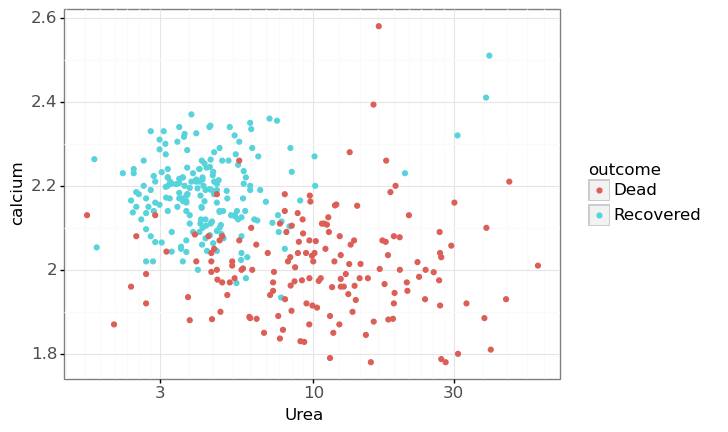

<ggplot: (-9223371905222392092)>

In [17]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, xlab, scale_x_log10, theme_bw, theme, element_text, theme_dark

(ggplot(data_1, aes('Urea', 'calcium', color = 'outcome'))
    + geom_point()
    + scale_x_log10()
    + theme_bw()
    + theme(text=element_text(size=12)))

# 21 rows cotain missing values

In [20]:
#only to not mess with your data

def disc(x):
    if x < 25: return 'Young'
    elif x < 40: return 'Adult'
    elif x < 60: return 'Middle Age'
    else: return 'Senior'

age_data = data_1.sort_values(by = ['age'])
age_data['label_age'] = age_data['age'].apply(lambda x: disc(x))
age_data.label_age = pd.Categorical(age_data.label_age, ordered=True, categories = ['Young', 'Adult', 'Middle Age', 'Senior'])
age_data.label_age


PATIENT_ID
157.0     Young
213.0     Young
102.0     Young
200.0     Adult
195.0     Adult
          ...  
247.0    Senior
313.0    Senior
309.0    Senior
290.0    Senior
212.0    Senior
Name: label_age, Length: 375, dtype: category
Categories (4, object): ['Young' < 'Adult' < 'Middle Age' < 'Senior']

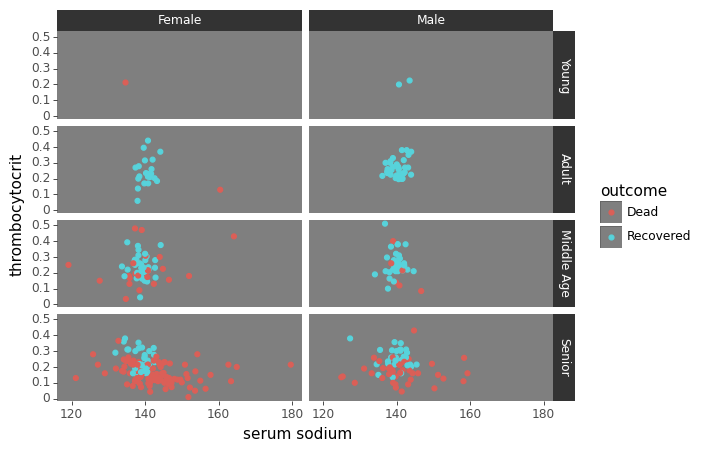

<ggplot: (-9223371905222477396)>

In [74]:
from plotnine import theme_dark, facet_grid, theme_classic, element_rect, element_line
(ggplot(age_data) 
    + facet_grid(facets = 'label_age ~ gender')
    + aes(x = 'serum sodium',
          y = 'thrombocytocrit',
          color = 'outcome')
    + geom_point()
    + theme_dark()
    + theme(
        panel_grid_minor = element_line(colour = "gray"),
        panel_grid_major = element_line(colour = "gray"))
) 

In [41]:
def disc(x):
    for i in range(16):
        if x > bins[i][0] and x <= bins[i][1]:
            return bins[i][0]
            
bins = [[i, i+5] for i in range(15, 95, 5)]

age_data['disc_age'] = age_data['age'].apply(lambda x: disc(x))

names = age_data.columns
for name in names[3:-3]:
    age_data[name].fillna(age_data[name].mean(), inplace = True)
age_data

,age,gender,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,eosinophils(%),Interleukin 2 receptor,...,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine,label_age,disc_age
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
157.0,18,Male,Recovered,1.900000,127.000000,103.850000,14.600000,0.020000,0.566667,934.595293,...,0.650000,0.090000,143.500000,0.225000,4.500000,41.000000,215.450000,12.500000,Young,15
213.0,19,Female,Dead,12.800000,108.000000,97.500000,16.900000,0.130000,0.600000,934.595293,...,51.900000,0.070000,134.500000,0.214387,8.000000,11.000000,130.800000,69.000000,Young,15
102.0,22,Male,Recovered,1.900000,138.000000,100.800000,15.000000,0.030000,0.700000,582.000000,...,22.600000,0.099745,140.600000,0.200000,16.000000,19.000000,127.900000,55.500000,Young,20
200.0,25,Female,Recovered,765.964278,125.219553,102.412216,15.607362,0.880558,0.680637,934.595293,...,70.413724,0.099745,140.737974,0.214387,33.867593,38.709738,84.037712,106.298131,Adult,20
195.0,26,Male,Recovered,1.900000,136.000000,98.200000,13.900000,0.020000,0.500000,447.000000,...,1.100000,0.150000,138.200000,0.300000,4.000000,16.000000,130.400000,48.000000,Adult,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247.0,90,Female,Dead,1382.400000,110.250000,105.800000,20.300000,0.183333,0.100000,934.595293,...,79.150000,0.070000,138.850000,0.072500,47.000000,12.333333,76.666667,72.666667,Senior,85
313.0,91,Female,Dead,15.900000,104.500000,105.566667,15.150000,0.115000,0.000000,1190.000000,...,140.700000,0.060000,144.566667,0.160000,60.000000,20.000000,87.100000,54.333333,Senior,90
309.0,92,Female,Dead,141.600000,119.750000,116.533333,22.400000,1.010000,0.000000,513.000000,...,154.633333,0.090000,151.533333,0.130000,39.000000,42.666667,43.675000,132.750000,Senior,90


In [54]:
import plotly.express as px


fig = px.scatter(age_data, x="hemoglobin", y="eosinophils(%)", 
            animation_frame="disc_age", #animation_group="gender",
            size="Interleukin 2 receptor", hover_data = ["gender"], 
            symbol = "outcome", symbol_map = {'dead':'x', 'alive':'circle'},
            range_x=[60,180], range_y=[-1, 6], size_max = 40, title = 'title')


fig.update_layout({'plot_bgcolor' : 'rgba(224, 236, 244, 0.3)'})
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
#fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(legend_title_text='    Outcome:')
fig.show()